<a href="https://colab.research.google.com/github/vishalkumarsingh999/Assesment_e/blob/main/Emply_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandasql
import pandas as pd
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=a02b499633676157e3bd2378c124469ee969ed2066a54e9dbe1c06d599d7f846
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [10]:
data=pd.read_csv('emplay.csv')
data_my=data
data.columns=['Transaction_ID', 'Profile_ID', 'Date_of_Booking','Date_of_Service_Requested', 'Source','Slot of Booking (Hour of the Day)']
data_my['month_name']=pd.DatetimeIndex(data['Date_of_Service_Requested']).month
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']



---


#Problems 1: Please plot month on month User acquisition rate?#
#Solution:#
We can group by month and create customers
dataframe by counting unique Profile IDs in each month, after that we
will create a bar plot from it.
\begin{align}
User\ Acquisition\ Rate = \frac{Total\ no\ of\ unique\ Profile\ id\ in \ month}{total\ number\ of\ booking\ in\ month}*100
\end{align}


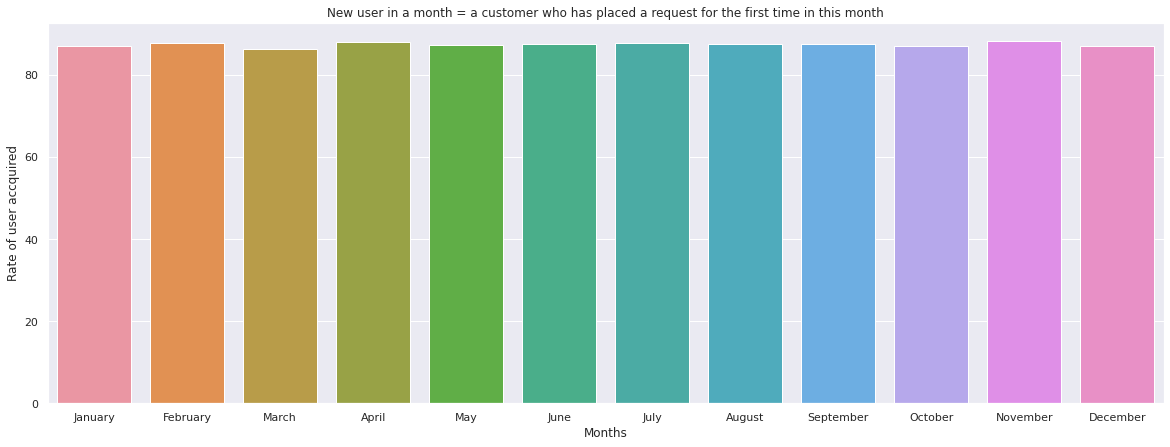

In [11]:
total_booking_in_month =data.groupby('month_name')['Profile_ID'].count()
unique_booking_in_month = data.groupby('month_name')['Profile_ID'].nunique()
Customer_Acquisition= {'month_name':month_list,'Acquisition_rate':((unique_booking_in_month/total_booking_in_month)*100).to_frame().iloc[:,:].values.reshape(1,12)[0]}
Customer_Acquisition_rate = pd.DataFrame(data= Customer_Acquisition)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data=Customer_Acquisition_rate,x='month_name',y='Acquisition_rate')
plt.xlabel('Months')
plt.title('New user in a month = a customer who has placed a request for the first time in this month')
plt.ylabel('Rate of user accquired')
plt.show()



---


#Problem 2. What is the month on month repeat rate?
#Solution:
\begin{align}
Month\ on\ Month\ Repeat\ Rate = \frac{customer\ booking\ more\ then\ one\ time\ in \ month}{total\ number\ of\ booking\ in\ month}*100
\end{align}

The month by month Repeat Rate percentage  :
                   0         1        2        3        4        5        6        7          8        9         10        11
month_name   January  February    March    April      May     June     July   August  September  October  November  December
Repeat_rate  12.9239   12.1387  13.6997  12.0064  12.7802  12.4951  12.1913  12.4279    12.4751  12.8427   11.6984   12.8706 





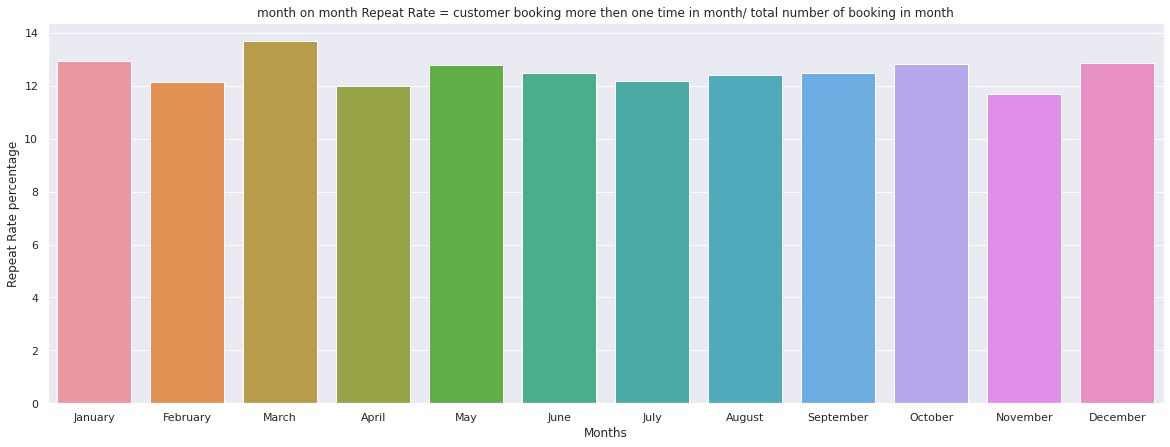

In [12]:

data['month_name']=pd.DatetimeIndex(data['Date_of_Service_Requested']).month
total_booking_in_month =data.groupby('month_name')['Profile_ID'].count()
unique_booking_in_month = data.groupby('month_name')['Profile_ID'].nunique()
repeat_booking_in_month = total_booking_in_month - unique_booking_in_month
Repeat_Customer= {'month_name':month_list,'Repeat_rate':((repeat_booking_in_month/total_booking_in_month)*100).to_frame().iloc[:,:].values.reshape(1,12)[0]}
Repeat_Customer_rate = pd.DataFrame(data=Repeat_Customer)
print('The month by month Repeat Rate percentage  :\n',Repeat_Customer_rate.T.to_string(),'\n\n\n')
#Now Plotting same values
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data=Repeat_Customer_rate,x='month_name',y='Repeat_rate')
plt.xlabel('Months')
plt.title('month on month Repeat Rate = customer booking more then one time in month/ total number of booking in month')
plt.ylabel('Repeat Rate percentage')
plt.show()



---


#Problem 3. Please define and measure the following repeat rates for each month?
##30-Day repeat rate:
#Solution:
Formula used:

\begin{align}
30\ day\ Repeat\ Rate = \frac{the\ number\ of\ customers\ who\ placed\ a\ repeat\ order\ within\ 30\ days}{the\ number\ of\ customers\ who\ have\ placed\ an\ order
}*100
\end{align}


\begin{align}
60\ day\ Repeat\ Rate = \frac{the\ number\ of\ customers\ who\ placed\ a\ repeat\ order\ within\ 60\ days}{the\ number\ of\ customers\ who\ have\ placed\ an\ order
}*100
\end{align}


\begin{align}
90\ day\ Repeat\ Rate = \frac{the\ number\ of\ customers\ who\ placed\ a\ repeat\ order\ within\ 90\ days}{the\ number\ of\ customers\ who\ have\ placed\ an\ order
}*100
\end{align}
#Implementation and Solution

In [52]:
q_30_day = """SELECT * FROM data d where d.Profile_ID IN 
(SELECT Profile_ID FROM data dd WHERE dd.Transaction_ID != d.Transaction_ID AND d.Profile_ID== dd.Profile_ID and
 (JULIANDAY(d.Date_of_Booking)-JULIANDAY(dd.Date_of_Booking)) BETWEEN 0 AND 31)   """
q_60_day = """SELECT * FROM data d where d.Profile_ID IN 
(SELECT Profile_ID FROM data dd WHERE dd.Transaction_ID != d.Transaction_ID AND d.Profile_ID== dd.Profile_ID and
 (JULIANDAY(d.Date_of_Booking)-JULIANDAY(dd.Date_of_Booking)) BETWEEN 0 AND 61)   """
q_90_day = """SELECT * FROM data d where d.Profile_ID IN 
(SELECT Profile_ID FROM data dd WHERE dd.Transaction_ID != d.Transaction_ID AND d.Profile_ID== dd.Profile_ID and
 (JULIANDAY(d.Date_of_Booking)-JULIANDAY(dd.Date_of_Booking)) BETWEEN 0 AND 91)   """


data_30_day = ps.sqldf(q_30_day, locals())
data_60_day = ps.sqldf(q_60_day, locals())
data_90_day = ps.sqldf(q_90_day, locals())


final_data.sort_values('Profile_ID')
tota=final_data['Profile_ID'].nunique()
Z1=pd.concat(i for _, i in final_data.groupby("Profile_ID") if len(i) > 1)

Repeat_Customer_rate_30=len(data_30_day['Profile_ID'])/(data['Profile_ID'].nunique())*100
print('The Repeat Rate percentage of 30 days is :',Repeat_Customer_rate_30,'%')
Repeat_Customer_rate_60=len(data_60_day['Profile_ID'])/(data['Profile_ID'].nunique())*100
print('The Repeat Rate percentage of 60 days is :',Repeat_Customer_rate_60,'%')
Repeat_Customer_rate_90=len(data_90_day['Profile_ID'])/(data['Profile_ID'].nunique())*100
print('The Repeat Rate percentage of 90 days is :',Repeat_Customer_rate_90,'%')

The Repeat Rate percentage of 30 days is : 40.56011010711507 %
The Repeat Rate percentage of 60 days is : 56.561546286876904 %
The Repeat Rate percentage of 90 days is : 65.83687391538507 %


###The Repeat Rate percentage of 30 days is : 40.56011010711507 %
###The Repeat Rate percentage of 60 days is : 56.561546286876904 %
###The Repeat Rate percentage of 90 days is : 65.83687391538507 %



---


#Problem 4. What is the best repeat rate metric among the above to follow and why?
##Solution:
##Using 30-day repeat rate matric seem to be more effective as it give 40.5% rate where 60-day and 90-day result 56.5% and 65.5% which is about 15.0% more in double number of days.



---


#Problem 5. Define churn period for this business and measure monthly churn rate?
\begin{align}
Churn\ Rate = \frac{total\ number\ of\ Profile\ ID\ not\ appear\ in\ current\ month}{total\ number\ of\ Profile\ ID\ present\ in\ last\ month}*100
\end{align}



---


#Problem 6. Plot repeat frequency distribution by users?

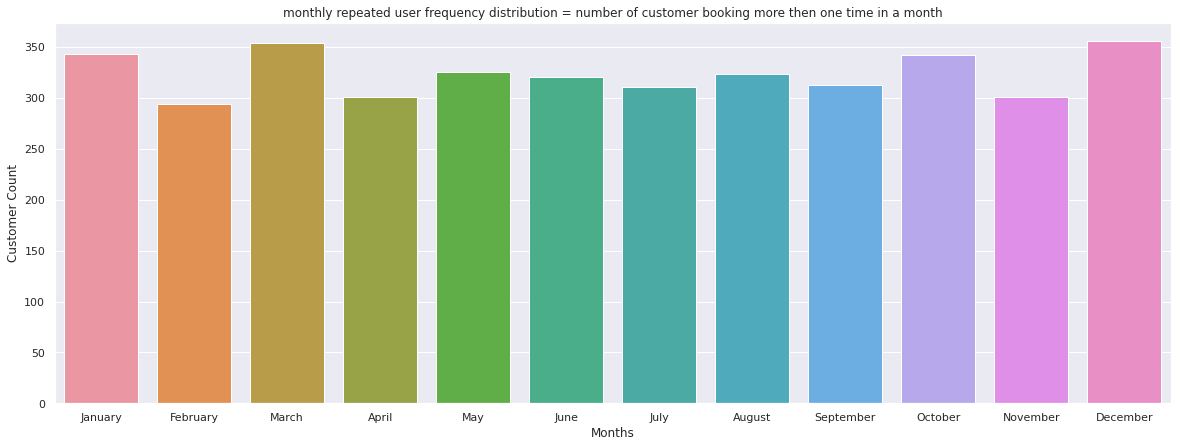

In [56]:
data['month_name']=pd.DatetimeIndex(data['Date_of_Service_Requested']).month
total_booking_in_month =data.groupby('month_name')['Profile_ID'].count()
unique_booking_in_month = data.groupby('month_name')['Profile_ID'].nunique()
repeat_booking_in_month = total_booking_in_month - unique_booking_in_month
Repeat_Customer2= {'month_name':month_list,'Number_of_Repeated_user':repeat_booking_in_month.to_frame().iloc[:,:].values.reshape(1,12)[0]}
Repeat_Customer2= pd.DataFrame(data=Repeat_Customer2)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data=Repeat_Customer2,x='month_name',y='Number_of_Repeated_user')
plt.xlabel('Months')
plt.title('monthly repeated user frequency distribution = number of customer booking more then one time in a month')
plt.ylabel('Customer Count')
plt.show()



---


#Problem 7. Using the data available, find out reasons why certain users are repeating and certain users are not?

###Solution: Possible Reason can be :
1.   Most of the user are attracted by Source C followed by D and B
2.   Most of the bookings are done on slot 14 and slot 13



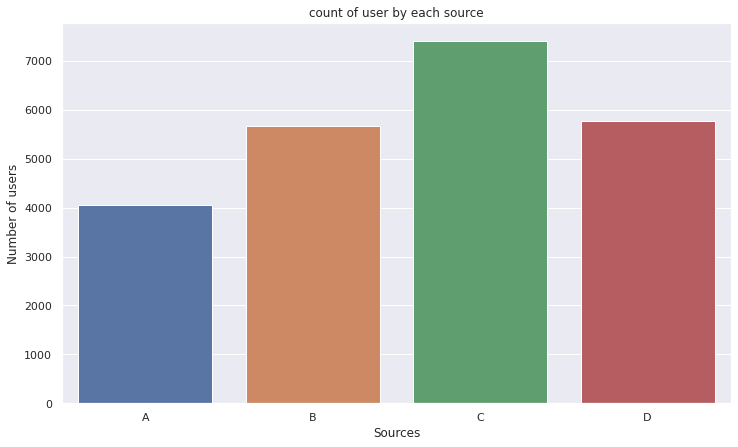

In [68]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,7)})
source_data=data.groupby('Source')['Profile_ID'].nunique().reset_index()
sns.barplot(data=source_data,x='Source',y='Profile_ID')
plt.xlabel('Sources')
plt.title('count of user by each source')
plt.ylabel('Number of users')
plt.show()

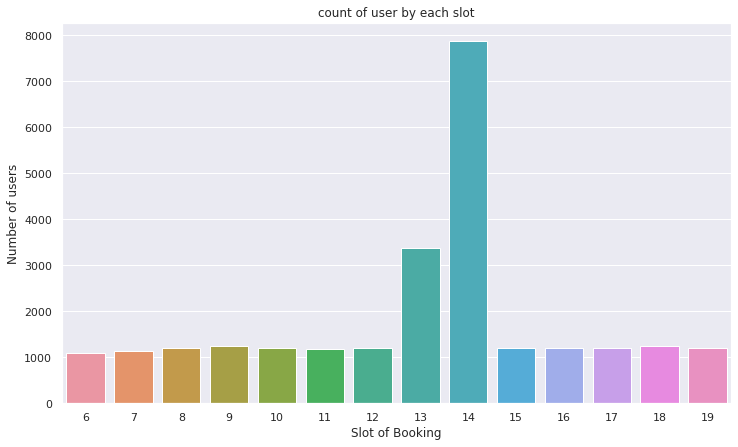

In [69]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,7)})
source_data=data.groupby('Slot of Booking (Hour of the Day)')['Profile_ID'].nunique().reset_index()
sns.barplot(data=source_data,x='Slot of Booking (Hour of the Day)',y='Profile_ID')
plt.xlabel('Slot of Booking')
plt.title('count of user by each slot')
plt.ylabel('Number of users')
plt.show()

#Other Reason for certain users are repeating and certain users are not, can be:


*   slots other then 14 and 13 not working properly, so user may feel Frustration and may left website then after sometime they may feel to try again.
*   some user may not like this website and services usefull as they visit one as trial then they left website and never come again.


